In [1]:
pwd

'/Users/abhisheksuga/Downloads'

In [2]:
cd '/Users/abhisheksuga/documents'

/Users/abhisheksuga/Documents


In [3]:
pwd


'/Users/abhisheksuga/Documents'

In [4]:
ls


DIA.excalidraw             Zoom/
Edu/                       kafka/
TABA_STATS.pdf             project_logs.docx
Terminal Saved Output.txt


In [5]:
cd Edu/dmml


/Users/abhisheksuga/Documents/Edu/DMML


In [6]:
cd projects/


/Users/abhisheksuga/Documents/Edu/DMML/projects


In [7]:
ls


mushrooms_dataset.csv


In [73]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('mushrooms_dataset.csv')

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
df.isnull().sum() #Checking if we have any null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

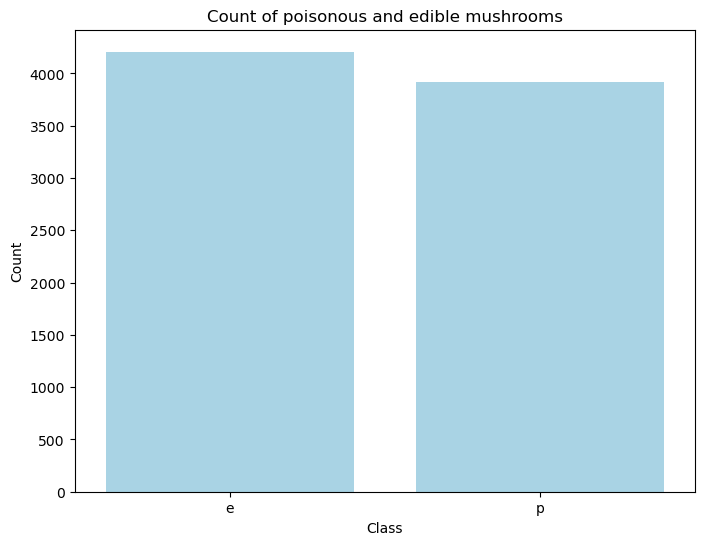

In [23]:
#Visualising the counts of the target varaible , i.e the class in our case 
count = df['class'].value_counts()
sn.set_context(font_scale=1.5)
plt.figure(figsize=(8,6))
sn.barplot(x=count.index, y=count.values, alpha=0.8, color="skyblue")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of poisonous and edible mushrooms')
plt.show()


In [27]:
df['class'].value_counts() #Checking the exact counts we see the data is not imbalanced 

class
e    4208
p    3916
Name: count, dtype: int64

In [46]:
x = df.drop(['class'], axis=1)  #seperating the dependent and the independent variables 
y = df["class"]

In [47]:
#since all the features are categorical in nature , using labelendoer to make them numerical 
labelencoder_x=LabelEncoder()
for column in x.columns:
    x[column] = labelencoder_x.fit_transform(x[column])
    
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [48]:
x.shape

(8124, 22)

In [49]:
x['veil-type']   #checking the contribution of veil-type feature 

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [50]:
x=x.drop(["veil-type"],axis=1) #dropping this particular feature , since it is not contributing to the target variable , it has only 0 values

In [43]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [44]:
x.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


In [61]:

y_df = pd.DataFrame(y, columns=['class'])  
combined_df = pd.concat([x, y_df], axis=1)  


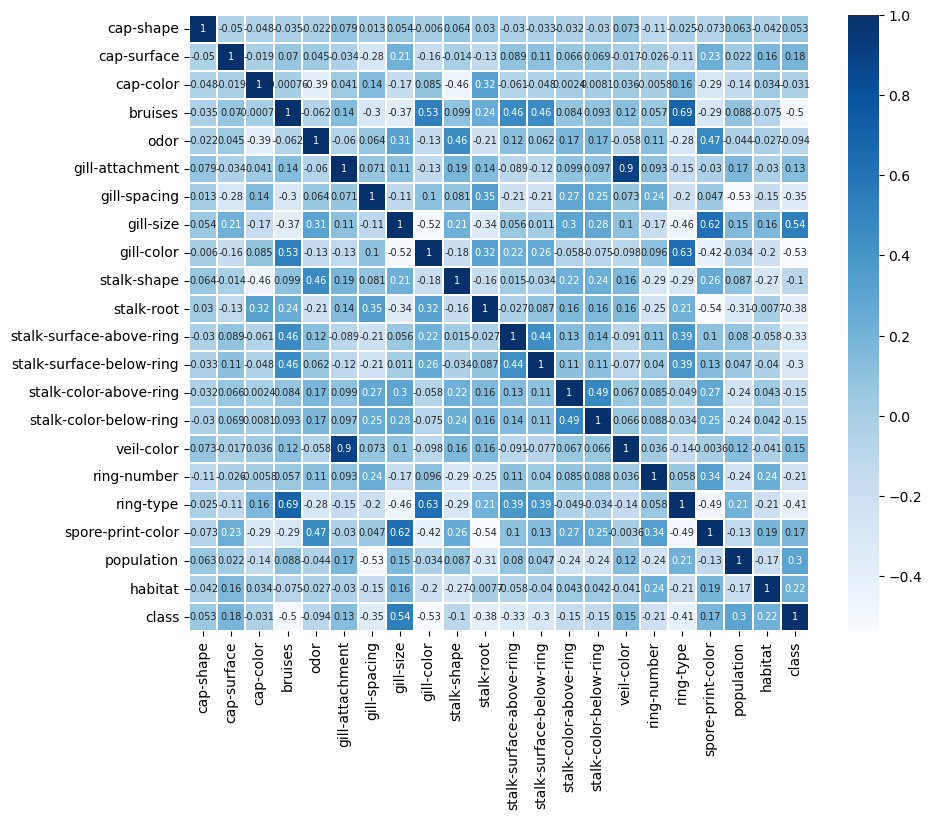

In [62]:
plt.figure(figsize=(10,8))
sn.heatmap(combined_df.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [63]:
combined_df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)


,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


/Users/abhisheksuga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


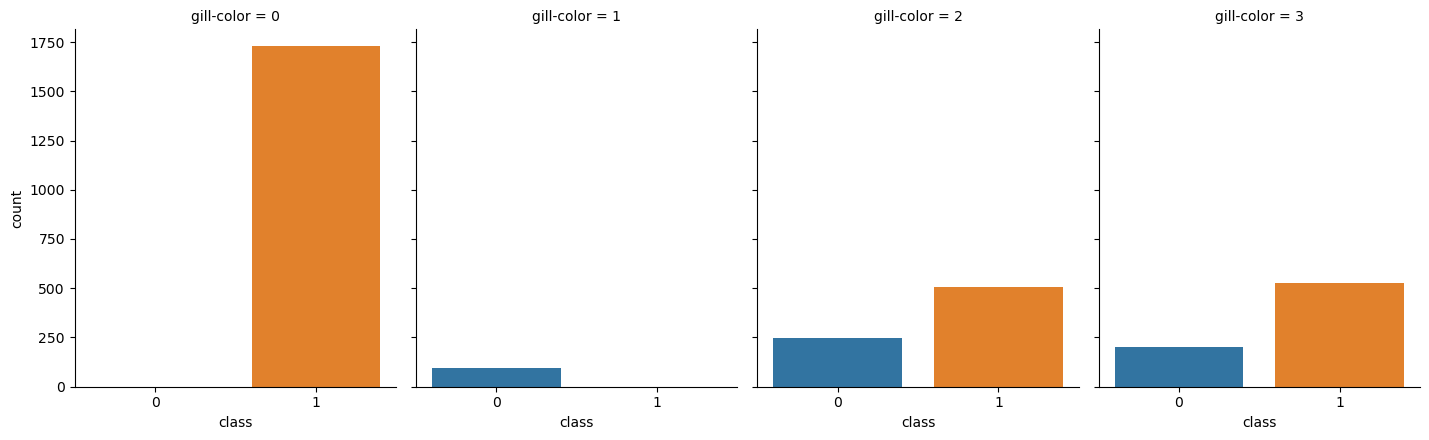

In [68]:
new_var = combined_df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 3.5]
sn.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4)

/Users/abhisheksuga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


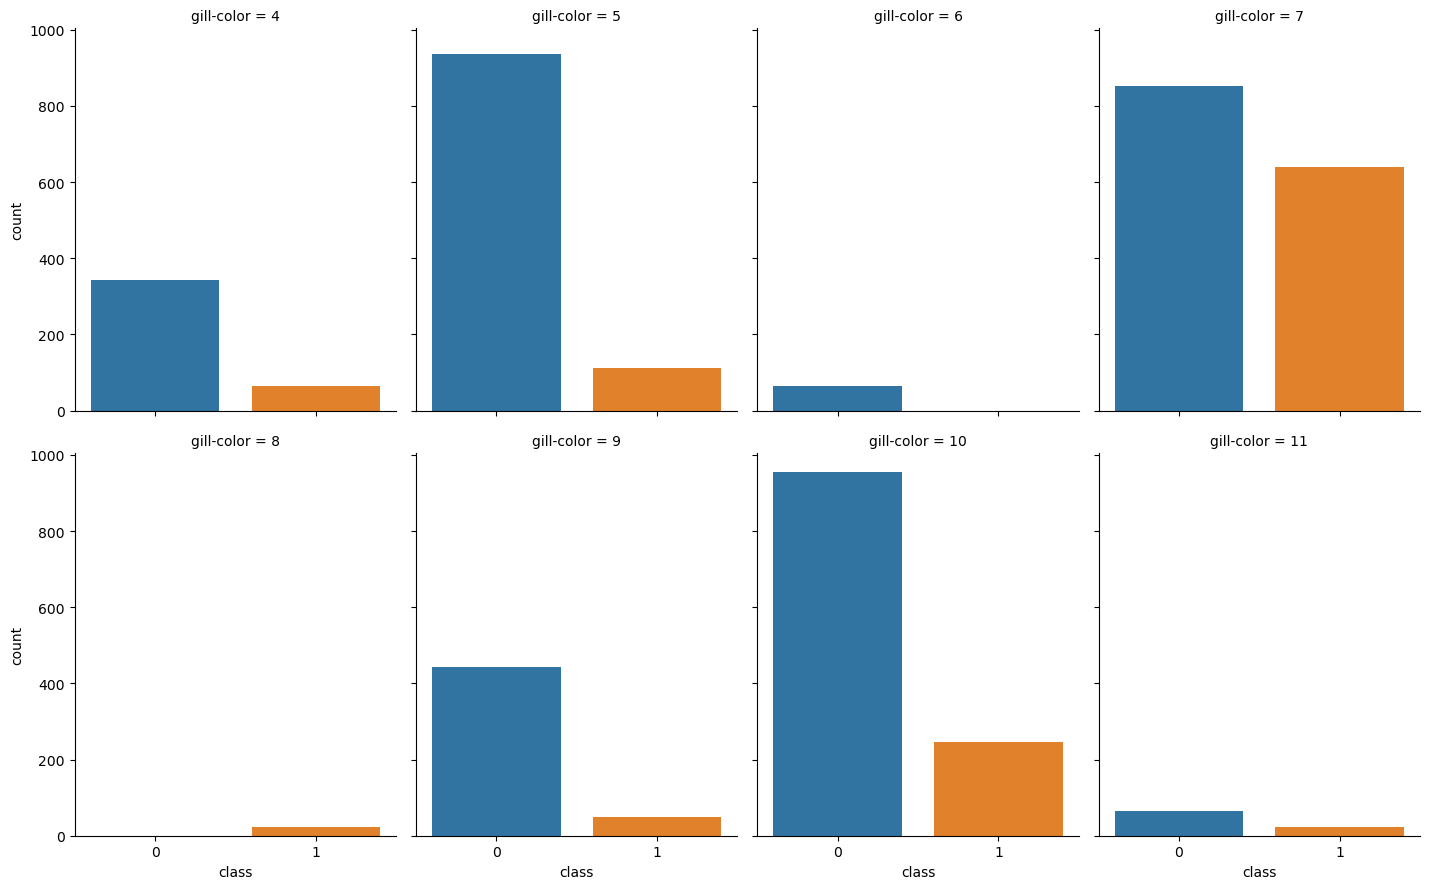

In [71]:
new_var=combined_df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sn.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=900, bbox_inches='tight')

In [104]:
X = combined_df.drop(['class'], axis=1)  
y = combined_df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)   

In [105]:
X_train.shape

(5686, 21)

In [106]:
y_train.shape

(5686,)

In [107]:
X_test.shape

(2438, 21)

In [108]:
y_test.shape

(2438,)

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


svm = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)





Best Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [127]:
svm = SVC()
svm.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [147]:
svm_default = SVC( gamma='scale',C=1.0 , kernel='rbf') #got 99.02 accuracy for the default params 

svm_gamma_1 = SVC(random_state=42, gamma=1 ,C=10 , kernel='linear') #got accuracy of 95.24%
svm_gamma_10 = SVC(random_state=42, gamma=10,C=10 , kernel='linear') #got accuracy of 99.06%
svm_gamma_100 = SVC(random_state=42, gamma=100,C=100 , kernel='linear') #got accuracy of 99.06% 
svm_recommended = SVC( gamma='auto',C=0.1, kernel='poly') #got 100%

svm_gamma_1.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 95.24%


In [148]:
from sklearn.metrics import classification_report


svm_default.fit(X_train, y_train)
svm_gamma_1.fit(X_train, y_train)
svm_gamma_10.fit(X_train, y_train)
svm_gamma_100.fit(X_train, y_train)
svm_recommended.fit(X_train, y_train)

y_pred_default = svm_default.predict(X_test)
y_pred_gamma_1 = svm_gamma_1.predict(X_test)
y_pred_gamma_10 = svm_gamma_10.predict(X_test)
y_pred_gamma_100 = svm_gamma_100.predict(X_test)
y_pred_recommended = svm_recommended.predict(X_test)




# Evaluate the models using classification report
print("SVM with default parameters:")
print(classification_report(y_test, y_pred_default))

print("SVM with y_pred_gamma_1 parameters:")
print(classification_report(y_test, y_pred_gamma_1))


print("SVM with y_pred_gamma_10 parameters:")
print(classification_report(y_test, y_pred_gamma_10))

print("SVM with y_pred_gamma_100 parameters:")
print(classification_report(y_test, y_pred_gamma_100))

print("SVM with y_pred_recommended parameters:")
print(classification_report(y_test, y_pred_recommended))

SVM with default parameters:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

SVM with y_pred_gamma_1 parameters:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1257
           1       0.98      1.00      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

SVM with y_pred_gamma_10 parameters:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1257
           1       0.98      1.00      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99   

In [149]:
!pip install libsvm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp311-cp311-macosx_11_0_arm64.whl size=179995 sha256=1cf4d58490f82f59a7032f4a5167a2e62c89ac72c66a4512ac81b3458c2dd489
  Stored in directory: /Users/abhisheksuga/Library/Caches/pip/wheels/8f/75/e4/e56ce92f54df4fad2b06e49bce70ad39a89f2442e67b3f4eef
Successfully built libsvm


In [163]:
from libsvm.svmutil import svm_train, svm_predict

X_libsvm = X_train.values.tolist()
X_test_libsvm = X_test.values.tolist()
y_libsvm =y_train.tolist()
y_test_libsvm =y_test.tolist()
# model_default = svm_train(y_libsvm, X_libsvm)

model = svm_train(y_libsvm, X_libsvm, '-s 0 -t 0 -c 1')  
# Make predictions on the test set
labels, accuracy, _ = svm_predict(y_test_libsvm, X_test_libsvm, model)

# Print the accuracy
print('Test Accuracy: {:.2f}%'.format(accuracy[0]))


.................................................................................
*......................................................
*
optimization finished, #iter = 135718
nu = 0.126796
obj = -672.499826, rho = 7.991642
nSV = 985, nBSV = 603
Total nSV = 985
Accuracy = 96.1034% (2343/2438) (classification)
Test Accuracy: 96.10%


In [161]:
# print(model_default.param)
print(model.param)

svm_type: 0
 kernel_type: 0
 degree: 3
 gamma: 0.047619047619047616
 coef0: 0.0
 cache_size: 100.0
 eps: 0.001
 C: 1.0
 nr_weight: 0
 weight_label: <importlib._bootstrap.LP_c_int object at 0x16a42efd0>
 weight: <svm.LP_c_double object at 0x16a42e350>
 nu: 0.5
 p: 0.1
 shrinking: 1
 probability: 0


In [162]:
 print(model_default.param)


svm_type: 0
 kernel_type: 2
 degree: 3
 gamma: 0.047619047619047616
 coef0: 0.0
 cache_size: 100.0
 eps: 0.001
 C: 1.0
 nr_weight: 0
 weight_label: <importlib._bootstrap.LP_c_int object at 0x16a42f6d0>
 weight: <svm.LP_c_double object at 0x16a42e350>
 nu: 0.5
 p: 0.1
 shrinking: 1
 probability: 0


In [164]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [165]:
naive_bayes.fit(X_train, y_train)


y_pred = naive_bayes.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9294503691550451
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

